In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
files_demographic = ["data/2api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv",
                     "data/2api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv",
                     "data/2api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv",
                     "data/2api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv",
                     "data/2api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv"]

df2 = pd.concat([pd.read_csv(f) for f in files_demographic], ignore_index=True)

print("Total demographic records:", len(df2))

Total demographic records: 2071700


Clean Demographic data 

In [24]:
print("Unique raw states: ", df2['state'].nunique())
print(df2['state'].value_counts())


Unique raw states:  65
state
Andhra Pradesh                              207687
Tamil Nadu                                  196857
West Bengal                                 168623
Uttar Pradesh                               167889
Maharashtra                                 162242
Karnataka                                   153957
Kerala                                      105515
Bihar                                        97621
Gujarat                                      96399
Odisha                                       92143
Rajasthan                                    89508
Telangana                                    89086
Madhya Pradesh                               76364
Assam                                        62834
Punjab                                       49611
Jharkhand                                    39653
Chhattisgarh                                 35726
Haryana                                      28554
Himachal Pradesh                             28037
Ut

In [25]:
df2["state_clean"]=df2['state'].str.lower().str.strip()

print("Unique raw states: ", df2['state_clean'].nunique())
print(df2['state_clean'].value_counts())

Unique raw states:  58
state_clean
andhra pradesh                              207740
tamil nadu                                  196857
west bengal                                 168727
uttar pradesh                               167889
maharashtra                                 162242
karnataka                                   153957
kerala                                      105515
bihar                                        97621
gujarat                                      96399
odisha                                       92198
rajasthan                                    89508
telangana                                    89086
madhya pradesh                               76364
assam                                        62834
punjab                                       49611
jharkhand                                    39653
chhattisgarh                                 35726
haryana                                      28554
himachal pradesh                             28

In [26]:
fix_map = {
    "andaman & nicobar": "andaman and nicobar islands",
    "andaman and nicobar": "andaman and nicobar islands",
    "andaman & nicobar islands": "andaman and nicobar islands",
    
    "chhatisgarh": "chhattisgarh",
    
    "orissa": "odisha",
    
    "pondicherry": "puducherry",
    
    "west bangal": "west bengal",
    "westbengal": "west bengal",
    "west  bengal": "west bengal",
    "west bengli": "west bengal",
    
    "jammu & kashmir": "jammu and kashmir",
    
    "dadra & nagar haveli": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli": "dadra and nagar haveli and  daman and diu",
    "daman and diu": "dadra and nagar haveli and  daman and diu",
    "daman & diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and  daman and diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    "the dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    
    "uttaranchal": "uttarakhand",
    "darbhanga": "bihar",
    "balanagar": "telangana",
    "jaipur": "rajasthan",
    "madanapalle": "andhra pradesh",
    "puttenahalli": "karnataka",
    "nagpur": "maharashtra",
    "raja annamalai puram": "tamil nadu",
    
    "100000" : None
    }

In [27]:
df2["state_clean"] = df2["state_clean"].replace(fix_map)
df2 = df2[df2["state_clean"].notna()]
print("Unique raw states: ", df2["state_clean"].nunique())
print(df2["state_clean"].value_counts())

Unique raw states:  36
state_clean
andhra pradesh                               207742
tamil nadu                                   196858
west bengal                                  169070
uttar pradesh                                167889
maharashtra                                  162243
karnataka                                    153958
odisha                                       105935
kerala                                       105515
bihar                                         97623
gujarat                                       96399
rajasthan                                     89510
telangana                                     89088
madhya pradesh                                76364
assam                                         62834
punjab                                        49611
jharkhand                                     39653
chhattisgarh                                  35730
haryana                                       28554
himachal pradesh             

Clean district in demographic data

In [28]:
print("Unique raw district: ", df2["district"].nunique())
print(df2["district"].value_counts())

Unique raw district:  982
district
North 24 Parganas                  12994
Pune                               12450
Barddhaman                         12349
East Godavari                      12186
Thrissur                           12097
Karimnagar                         10045
Hyderabad                          10010
West Godavari                      10007
Ernakulam                           9895
Warangal                            9857
Bengaluru                           9776
Palakkad                            9726
Thiruvananthapuram                  9673
Medak                               9196
Nalgonda                            9158
Krishna                             9123
Guntur                              9101
Tirunelveli                         9088
Prakasam                            8873
Hooghly                             8782
Vellore                             8672
Coimbatore                          8670
Kollam                              8593
Chittoor              

In [29]:
df2["district_clean"]=df2['district'].str.lower().str.strip()

print("Unique raw district: ", df2['district_clean'].nunique())
print(df2['district_clean'].value_counts())

Unique raw district:  960
district_clean
north 24 parganas                  12994
pune                               12450
barddhaman                         12349
east godavari                      12186
thrissur                           12097
karimnagar                         10045
hyderabad                          10010
west godavari                      10007
ernakulam                           9895
warangal                            9857
bengaluru                           9776
palakkad                            9726
thiruvananthapuram                  9673
medak                               9196
nalgonda                            9158
krishna                             9123
guntur                              9101
tirunelveli                         9088
hooghly                             8951
prakasam                            8873
vellore                             8672
coimbatore                          8670
kollam                              8593
chittoor        

In [30]:
fix_map = {
    "allahabad": "prayagraj",
    "faizabad": "ayodhya",
    "hoshangabad": "narmadapuram",
    "ahmednagar": "ahilyanagar",
    "ahmadnagar": "ahilyanagar",
    "ahmed nagar": "ahilyanagar",
    "osmanabad": "dharashiv",

    "bangalore": "bengaluru",
    "bangalore urban": "bengaluru urban",
    "bangalore rural": "bengaluru rural",
    "calcutta": "kolkata",
    "madras": "chennai",
    "trivandrum": "thiruvananthapuram",
    "mysore": "mysuru",

    "bellary": "ballari",
    "bijapur": "vijayapura",
    "chickmagalur": "chikkamagaluru",
    "chikmagalur": "chikkamagaluru",
    "chickballapur": "chikkaballapura",
    "chikballapur": "chikkaballapura",
    "gulbarga": "kalaburagi",

    "greater mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "mumbai city": "mumbai",
    "mumbai( sub urban )": "mumbai",
    "bombay": "mumbai",
    "poona": "pune",

    "rangareddy": "ranga reddy",
    "rangareddi": "ranga reddy",
    "k.v. rangareddy": "ranga reddy",
    "k.v.rangareddy": "ranga reddy",
    "cuddapah": "ysr kadapa",
    "kadapa": "ysr kadapa",
    "ysr": "ysr kadapa",
    "y s r": "ysr kadapa",
    "y. s. r": "ysr kadapa",
    "vizag": "visakhapatnam",
    "visakhapatanam": "visakhapatnam",
    "ananthapur": "ananthapuramu",
    "anantapur": "ananthapuramu",

    "tuticorin": "thoothukudi",
    "tiruvallur": "thiruvallur",
    "kancheepuram": "kanchipuram",
    "vellore rural": "vellore",
    "tirupathur": "tirupattur",
    "villupuram": "viluppuram",

    "palghat": "palakkad",
    "cannanore": "kannur",
    "alleppey": "alappuzha",
    "cochin": "ernakulam",
    "quilion": "kollam",
    "quilon": "kollam",
    "trichur": "thrissur",

    "balasore": "baleshwar",
    "cuttack sadar": "cuttack",

    "sibsagar": "sivasagar",
    "darrang": "darang",
    "gauhati": "kamrup metro",
    "north cachar hills": "dima hasao",

    "purnea": "purnia",
    "samstipur": "samastipur",

    "durg bhilai": "durg",

    "leh ladakh": "leh",
    "kargil ladakh": "kargil",

    "ahmadabad": "ahmedabad",
    "ahmedabad city": "ahmedabad",
    "ahmedabad rural": "ahmedabad",
    "baroda": "vadodara",

    "24 paraganas north": "north 24 parganas",
    "north twenty four parganas": "north 24 parganas",
    "24 paraganas south": "south 24 parganas",
    "south twenty four parganas": "south 24 parganas",
    "medinipur": "paschim medinipur",
    "west midnapore": "paschim medinipur",
    "east midnapore": "purba medinipur",
    "bardhaman east": "purba bardhaman",
    "barddhaman": "purba bardhaman",
    "bardhaman": "purba bardhaman",
    "burdwan": "purba bardhaman",
    "bardhaman west": "paschim bardhaman",
    "hooghiy": "hooghly",
    "hugli": "hooghly",
    "hawrah": "howrah",
    "haora": "howrah",

    "banaras": "varanasi",

    "gurgaon": "gurugram",
    "yamuna nagar": "yamunanagar",

    "pondicherry": "puducherry",

    "aurangabad(bh)": "aurangabad",
    "ashoknagar": "ashok nagar",
    "east nimar": "khandwa",
    "west nimar": "khargone",

    "bagpat": "baghpat",
    "belgaum": "belagavi",
    "bid": "beed",
    "bijapur(kar)": "vijayapura",
    "sheikpura": "sheikhpura",
    "shrawasti": "shravasti",
    "siddharthnagar": "siddharth nagar",
    "surendra nagar": "surendranagar",
    "warangal (urban)": "warangal",
    "warangal urban": "warangal",
    "warangal rural": "warangal",

    "bokaro *": "bokaro",
    "bagalkot *": "bagalkot",
    "gadag *": "gadag",
    "harda *": "harda",
    "haveri *": "haveri",
    "hingoli *": "hingoli",
    "namakkal   *": "namakkal",
    "kendrapara *": "kendrapara",
    "udupi *": "udupi",
    "washim *": "washim",

    "the nilgiris": "nilgiris",
    "the dangs": "dang",
    "nicobars": "nicobar",

    "na": None,
    "n a": None,
    "null": None,
    "unknown": None,
    "0": None,
    "100000": None,
    "northeast   *": None,
    "north and middle andaman": None,
    "andamans": None,
    "east": None,
    "west": None,
    "north": None,
    "south": None,
    "new delhi": None,
    "najafgarh": None,

    "baleswar": "baleshwar",
    "banas kantha": "banaskantha",
    "bara banki": "barabanki",
    "cooch behar": "koch bihar",
    "khorda": "khordha",
    "puruliya": "purulia",
    "kasargod": "kasaragod",
    "karim nagar": "karimnagar",
    "hasan": "hassan",
    "hardwar": "haridwar",

    "chamrajanagar": "chamarajanagar",
    "chamrajnagar": "chamarajanagar",
    "chamarajanagar *": "chamarajanagar",

    "dadra & nagar haveli": "dadra and nagar haveli",

    "dhalai  *": "dhalai",
    "garhwa *": "garhwa",
    "gondiya *": "gondia",
    "nandurbar *": "nandurbar",
    "kushinagar *": "kushinagar",

    "gondiya": "gondia",
    "monghyr": "munger",
    "mammit": "mamit",
    "lahul & spiti": "lahaul and spiti",

    "medchal?malkajgiri": "medchal-malkajgiri",
    "medchal−malkajgiri": "medchal-malkajgiri",

    "sas nagar (mohali)": "s.a.s nagar(mohali)",

    "south 24 pargana": "south 24 parganas",

    "n. t. r": "ntr",

}


In [31]:
pd.set_option('display.max_rows', 1000)
df2["district_clean"] = df2["district_clean"].replace(fix_map)
df2 = df2[df2["district_clean"].map(df2["district_clean"].value_counts()) >= 10]
df2 = df2[df2["district_clean"].notna()]

print("Unique raw districts: ", df2["district_clean"].nunique())
print(df2["district_clean"].value_counts())


Unique raw districts:  830
district_clean
purba bardhaman                    22374
ananthapuramu                      19696
bengaluru                          17862
mumbai                             17569
north 24 parganas                  17435
belagavi                           15626
viluppuram                         13124
ranga reddy                        12717
warangal                           12609
pune                               12450
purba medinipur                    12353
east godavari                      12186
thrissur                           12097
south 24 parganas                  11884
karimnagar                         10683
paschim medinipur                  10417
ahilyanagar                        10330
ysr kadapa                         10032
hyderabad                          10010
west godavari                      10007
ernakulam                           9895
hooghly                             9810
palakkad                            9726
ahmedabad      

Finding Insights


In [32]:
df2["total_demographic"] = (df2["demo_age_5_17"] + df2["demo_age_17_"])
state_summary = (df2.groupby("state_clean")["total_demographic"].sum().reset_index().sort_values(by="total_demographic", ascending=False))
print(state_summary)

                                  state_clean  total_demographic
33                              uttar pradesh            8542322
20                                maharashtra            5054601
4                                       bihar            4814350
35                                west bengal            3872719
19                             madhya pradesh            2912938
28                                  rajasthan            2817615
1                              andhra pradesh            2295582
30                                 tamil nadu            2212222
6                                chhattisgarh            2005438
10                                    gujarat            1824327
15                                  karnataka            1695285
31                                  telangana            1629907
8                                       delhi            1434678
14                                  jharkhand            1401189
11                       

In [33]:
state_summary = state_summary.reset_index(drop=True)
state_summary["Overall_Rank"] = range(1, len(state_summary)+1)
top10 = state_summary.head(10).copy()
top10=top10.reset_index(drop=True)
top10["Top10 Rank"] = range(1, len(top10) + 1)
print("/n Top 10 states by demographic:")
print(top10[["Top10 Rank", "state_clean", "total_demographic"]].to_string(index=False))

/n Top 10 states by demographic:
 Top10 Rank    state_clean  total_demographic
          1  uttar pradesh            8542322
          2    maharashtra            5054601
          3          bihar            4814350
          4    west bengal            3872719
          5 madhya pradesh            2912938
          6      rajasthan            2817615
          7 andhra pradesh            2295582
          8     tamil nadu            2212222
          9   chhattisgarh            2005438
         10        gujarat            1824327


In [34]:
bottom10 = state_summary.tail(10).copy()
bottom10=bottom10.reset_index(drop=True)
bottom10["Bottom10 Rank"] = range(1, len(bottom10) + 1)
print("/n Bottom 10 states by demographic:")
print(bottom10[["Bottom10 Rank", "state_clean", "total_demographic"]].to_string(index=False))

/n Bottom 10 states by demographic:
 Bottom10 Rank                               state_clean  total_demographic
             1                                   mizoram              41906
             2                                  nagaland              36791
             3                         arunachal pradesh              36443
             4                                       goa              35112
             5                                puducherry              32763
             6 dadra and nagar haveli and  daman and diu              12204
             7                                    sikkim               7738
             8                                    ladakh               5735
             9               andaman and nicobar islands               4487
            10                               lakshadweep               1176


Visualizing the demographic distribution across states

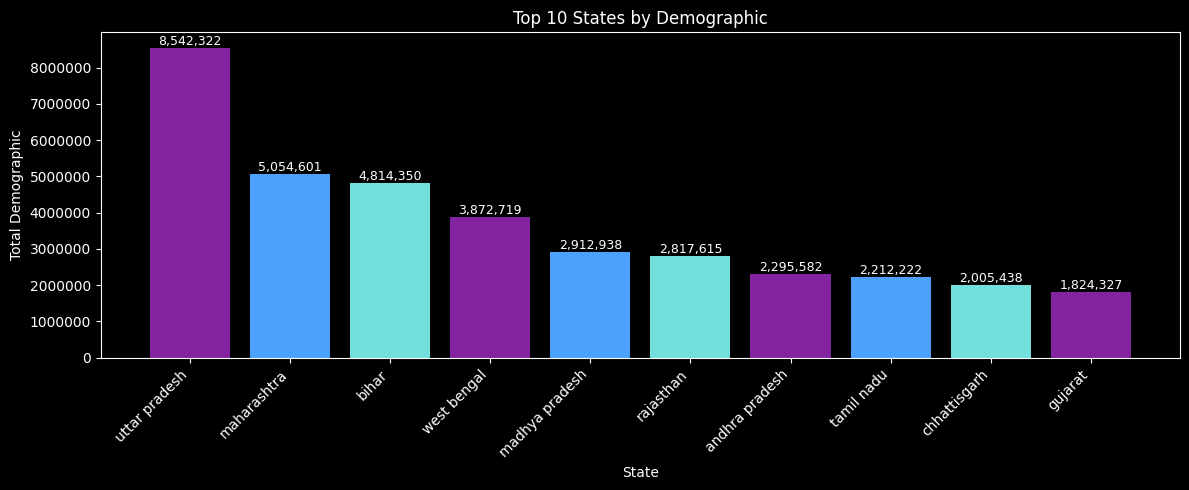

In [35]:
# for top 10 states, plot a bar chart
colors = ["#82249f", "#4CA1FC", "#72dfdd"]

plt.figure(figsize=(12,5))
bars = plt.bar(
    top10["state_clean"],
    top10["total_demographic"],
    color=colors * 4  
)


plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Demographic")
plt.xlabel("State")
plt.ylabel("Total Demographic")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


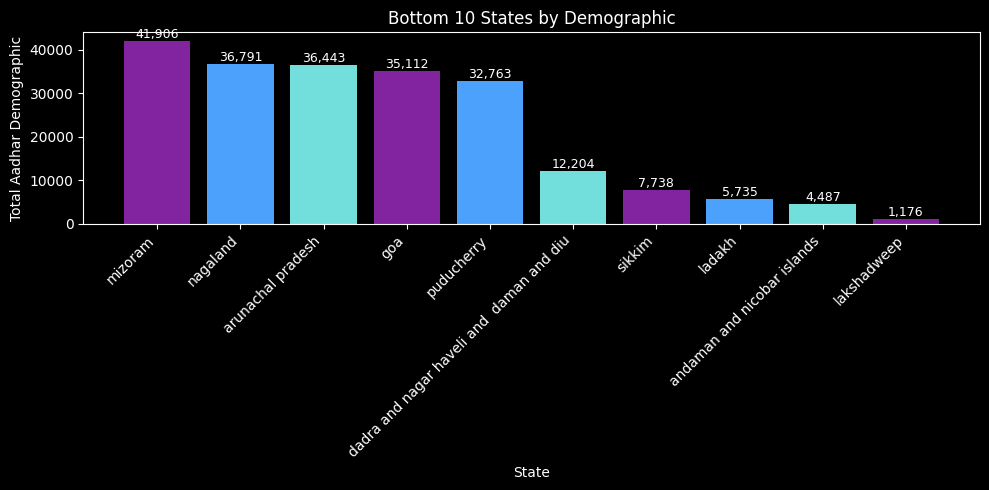

In [36]:
# for bottom 10 states, plot a bar chart
plt.figure(figsize=(10,5))
bars = plt.bar(
    bottom10["state_clean"],
    bottom10["total_demographic"],
    color=colors * 4
)

plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 States by Demographic")
plt.xlabel("State")
plt.ylabel("Total Aadhar Demographic")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

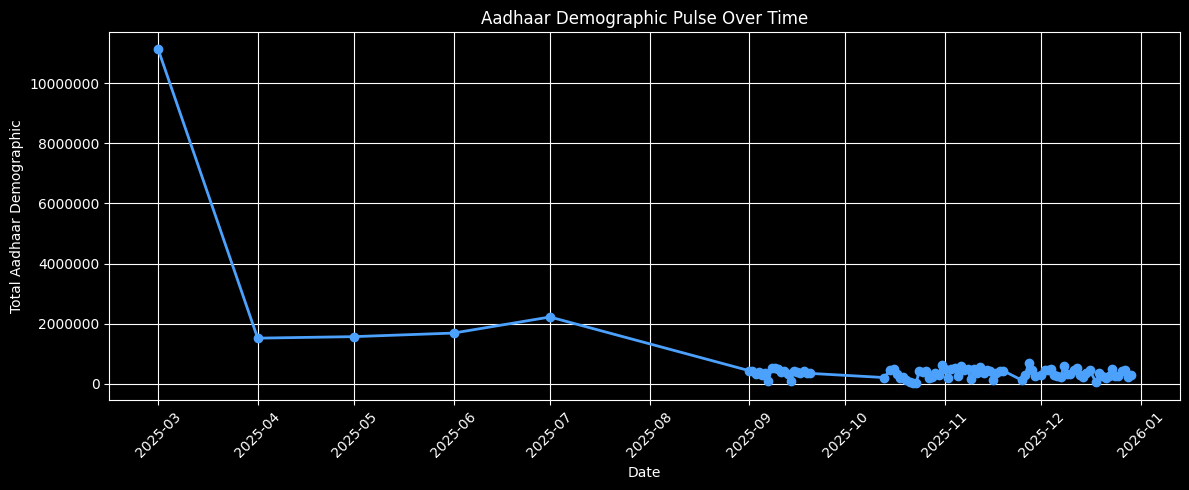

In [37]:
# Line plot of demographic over time
df2["date"] = pd.to_datetime(
    df2["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

df2 = df2[df2["date"].notna()]

daily_pulse = (
    df2.groupby("date")["total_demographic"]
      .sum()
      .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(
    daily_pulse["date"],
    daily_pulse["total_demographic"],
    color=colors[1], 
    marker="o",
    linewidth=2
)

plt.title("Aadhaar Demographic Pulse Over Time")
plt.xlabel("Date")
plt.ylabel("Total Aadhaar Demographic")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

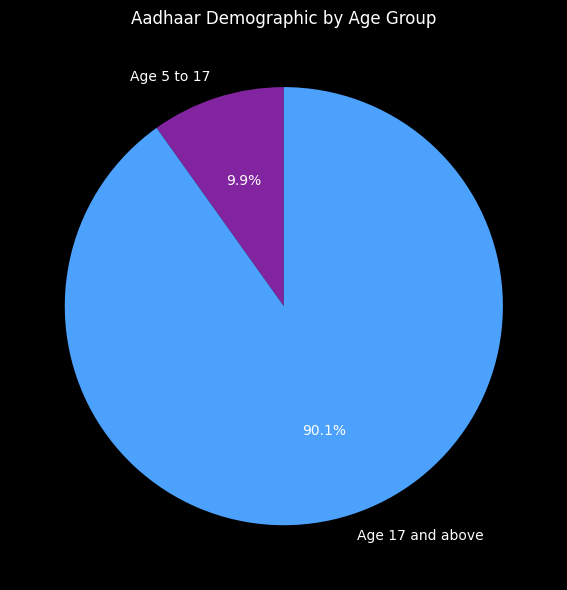

In [38]:
# pie chart 
plt.figure(figsize=(6,6))
plt.pie([df2['demo_age_5_17'].sum(), df2['demo_age_17_'].sum()], 
        labels=["Age 5 to 17", "Age 17 and above"], 
        autopct=lambda p: f"{p:.1f}%",
        startangle=90,
        colors=colors
       )
plt.title("Aadhaar Demographic by Age Group")
plt.tight_layout()
plt.show()